# A simple linear regression model using Helsinki housing market data

* The data is collected from the oikotie.fi website. I have made a restapi if you want to use the data go to the my github page: https://github.com/aapopalkama/oikotie-helsinki-restapi or directly from the restapi link: https://oikotie-helsinki-restapi.herokuapp.com/ 

* Necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

* Data retrieval and preparation

In [2]:
#   Helsinki housing market data from oikotie.fi. 
data = requests.get('https://oikotie-helsinki-restapi.herokuapp.com/').json()
df = pd.DataFrame.from_dict(data)
df = df[["Asuinpinta-ala","Velaton hinta"]]
#   Aparments smaller than 150 square meters
df = df[df["Asuinpinta-ala"] < 150]

#   Drop if Nan value
df.dropna(subset = ["Asuinpinta-ala"], inplace=True)

#   Dataframe to numpy array
data = df.to_numpy()
data



array([[7.2500e+01, 2.9525e+05],
       [2.3500e+01, 1.9300e+05],
       [1.1600e+02, 2.9900e+05],
       ...,
       [1.1440e+02, 9.9700e+05],
       [5.5000e+01, 3.6990e+05],
       [6.8000e+01, 2.8900e+05]])

* Define x and y values for model

In [3]:
x = data[:,0]
y = data[:,1].reshape(x.size, 1)
x = np.vstack((np.ones((x.size)), x)).T
print(x.shape)
y.shape



(6218, 2)


(6218, 1)

* Scatterplot
* The x axis is the sie of the apartment and the y axis is the price

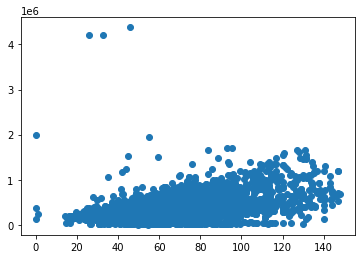

In [4]:
plt.scatter(x[:,1], y)
plt.show()

* Iterations and learning rate

In [5]:
# Iterates as many times as there are apartments
iteration = len(df["Asuinpinta-ala"].to_list())
learning_rate = 0.00000005

# Lets build our model




In [6]:
def model(x,y,learning_rate, iteration):   
    m = y.size
    theta = np.zeros((2,1))
    for i in range(iteration):   
#       Cost Function    
        y_pred = np.dot(x, theta)           
#       Gradient Descent  
        d_theta = (1/m)*np.dot(x.T, y_pred-1)
        theta = (theta - learning_rate*d_theta)
    return theta

* Now we can study and predict the price of an apartment by squares
* Lets try sizes 20, 25, 30, 53, 67 and 100

In [7]:
sizes = [[1,20],[1,25],[1,30],[1,53],[1,67],[1,100]]

In [8]:
# Connect to function
theta = model(x,y,learning_rate=learning_rate, iteration=iteration)
house_prediction = np.array(sizes)
for house in house_prediction:
    print("The price of an apartment of",house[1], "m^2 is around",(round(np.dot(house, theta)[0],2)*10**6),"€")



The price of an apartment of 20 m^2 is around 210000.0 €
The price of an apartment of 25 m^2 is around 260000.0 €
The price of an apartment of 30 m^2 is around 310000.0 €
The price of an apartment of 53 m^2 is around 550000.0 €
The price of an apartment of 67 m^2 is around 700000.0 €
The price of an apartment of 100 m^2 is around 1040000.0 €


* Prices seem "pretty" reasonable considering how simple the model is. The price forecast is based on the prices of current and sold apartments in Helsinki after January 2022